In [20]:
import pandas as pd
import numpy as np

df = pd.read_csv("train.csv", encoding='utf-8') # 26,457행
test = pd.read_csv("test.csv", encoding='utf-8') # 10,000행

In [21]:
### 1. 전처리
# 1) 결측치
df.isnull().sum() #occyp_type 열에 null 값 존재 (8,171행)
df['occyp_type'] = df['occyp_type'].fillna("No")
test['occyp_type'] = test['occyp_type'].fillna("No")
# 2) 중복
dup = df.duplicated()
dup_df = pd.concat([df, dup], axis=1)
dup_df[dup_df[0]==True] #중복 행 없음
df.describe() # FLAG_MOBIL열은 모두 같은 값으로 필요 없음
df = df.drop(columns=['FLAG_MOBIL', 'index'])
test = test.drop(columns=['FLAG_MOBIL', 'index'])

In [23]:
# 3) 음수 > 양수 치환
# begin_month: 카드 소지 기간으로 생각해도 무방 (단순 절대값)
df['begin_month'] = abs(df['begin_month'])
test['begin_month'] = abs(test['begin_month'])
# 카드발급 신청 시기로, 한 사람이 여러번 카드 발급 신청 한 경우 중복될 수 있음
begin_month = df.duplicated(['gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'work_phone', 'phone', 'email', 'occyp_type',
       'family_size', 'credit']) # begin_month 제외
bmdup_df = pd.concat([df, begin_month], axis=1)
bmdup_df[bmdup_df[0]==True] # 14,358행
df = df.drop_duplicates(['gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'work_phone', 'phone', 'email', 'occyp_type',
       'family_size', 'credit'], keep='first') # begin_month 제외 (> 12,099행)

In [25]:
# days_birth: year(나이)데이터로 변경
df['years_birth'] = abs(round(df['DAYS_BIRTH']/365, 0))
test['years_birth'] = abs(round(test['DAYS_BIRTH']/365, 0))
df[['DAYS_BIRTH', 'years_birth']].head(5)
df['years_birth'].value_counts(ascending=False)
# days_emplyed: 마지막으로 고용되어 일한 날짜를 음수로 표기, 양수는 무직 일 수 > 0
df['years_employed'] = df['DAYS_EMPLOYED'].apply(lambda x: abs(round(x/365, 0)) if x<0 else 0)
test['years_employed'] = test['DAYS_EMPLOYED'].apply(lambda x: abs(round(x/365, 0)) if x<0 else 0)
df[['DAYS_EMPLOYED', 'years_employed']].head(5)
df['years_employed'].value_counts(ascending=False)

C:\Users\user\AppData\Local\Temp\ipykernel_13672\1370909638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['years_birth'] = abs(round(df['DAYS_BIRTH']/365, 0))
C:\Users\user\AppData\Local\Temp\ipykernel_13672\1370909638.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['years_employed'] = df['DAYS_EMPLOYED'].apply(lambda x: abs(round(x/365, 0)) if x<0 else 0)


years_employed
0.0     2401
1.0     1172
2.0     1032
3.0     1026
4.0      896
5.0      804
6.0      653
7.0      623
8.0      526
9.0      474
10.0     395
11.0     289
12.0     234
15.0     234
13.0     213
14.0     170
16.0     113
19.0      94
17.0      94
20.0      81
18.0      79
21.0      68
22.0      66
23.0      48
24.0      46
26.0      37
25.0      37
28.0      35
27.0      32
29.0      23
33.0      18
30.0      15
31.0      14
32.0      11
34.0      10
41.0       9
35.0       8
36.0       5
40.0       4
38.0       4
39.0       3
43.0       2
37.0       1
Name: count, dtype: int64

In [34]:
### 2. 인코딩
# 1) mean encoding > test 데이터셋에 credit 열이 없어서 적용이 안될거같은뎅
# 2) label encoding
df['gender_label'] = pd.Categorical(df['gender']).codes
df['car_label'] = pd.Categorical(df['car']).codes
df['reality_label'] = pd.Categorical(df['reality']).codes
df['income_label'] = pd.Categorical(df['income_type']).codes
df['edu_label'] = pd.Categorical(df['edu_type']).codes
df['family_label'] = pd.Categorical(df['family_type']).codes
df['house_label'] = pd.Categorical(df['house_type']).codes
df['occyp_label'] = pd.Categorical(df['occyp_type']).codes
df_label = df[['child_num', 'income_total', 'work_phone', 'phone', 'email',
       'family_size', 'begin_month', 'credit', 'years_birth', 'years_employed',
       'gender_label', 'car_label', 'reality_label', 'income_label', 
       'edu_label', 'family_label', 'house_label', 'occyp_label']]

test['gender_label'] = pd.Categorical(test['gender']).codes
test['car_label'] = pd.Categorical(test['car']).codes
test['reality_label'] = pd.Categorical(test['reality']).codes
test['income_label'] = pd.Categorical(test['income_type']).codes
test['edu_label'] = pd.Categorical(test['edu_type']).codes
test['family_label'] = pd.Categorical(test['family_type']).codes
test['house_label'] = pd.Categorical(test['house_type']).codes
test['occyp_label'] = pd.Categorical(test['occyp_type']).codes
test_label = test[['child_num', 'income_total', 'work_phone', 'phone', 'email',
       'family_size', 'begin_month', 'years_birth', 'years_employed',
       'gender_label', 'car_label', 'reality_label', 'income_label', 
       'edu_label', 'family_label', 'house_label', 'occyp_label']]

FileNotFoundError: [Errno 2] No such file or directory: '../figure/boxplot_years_employed.png'

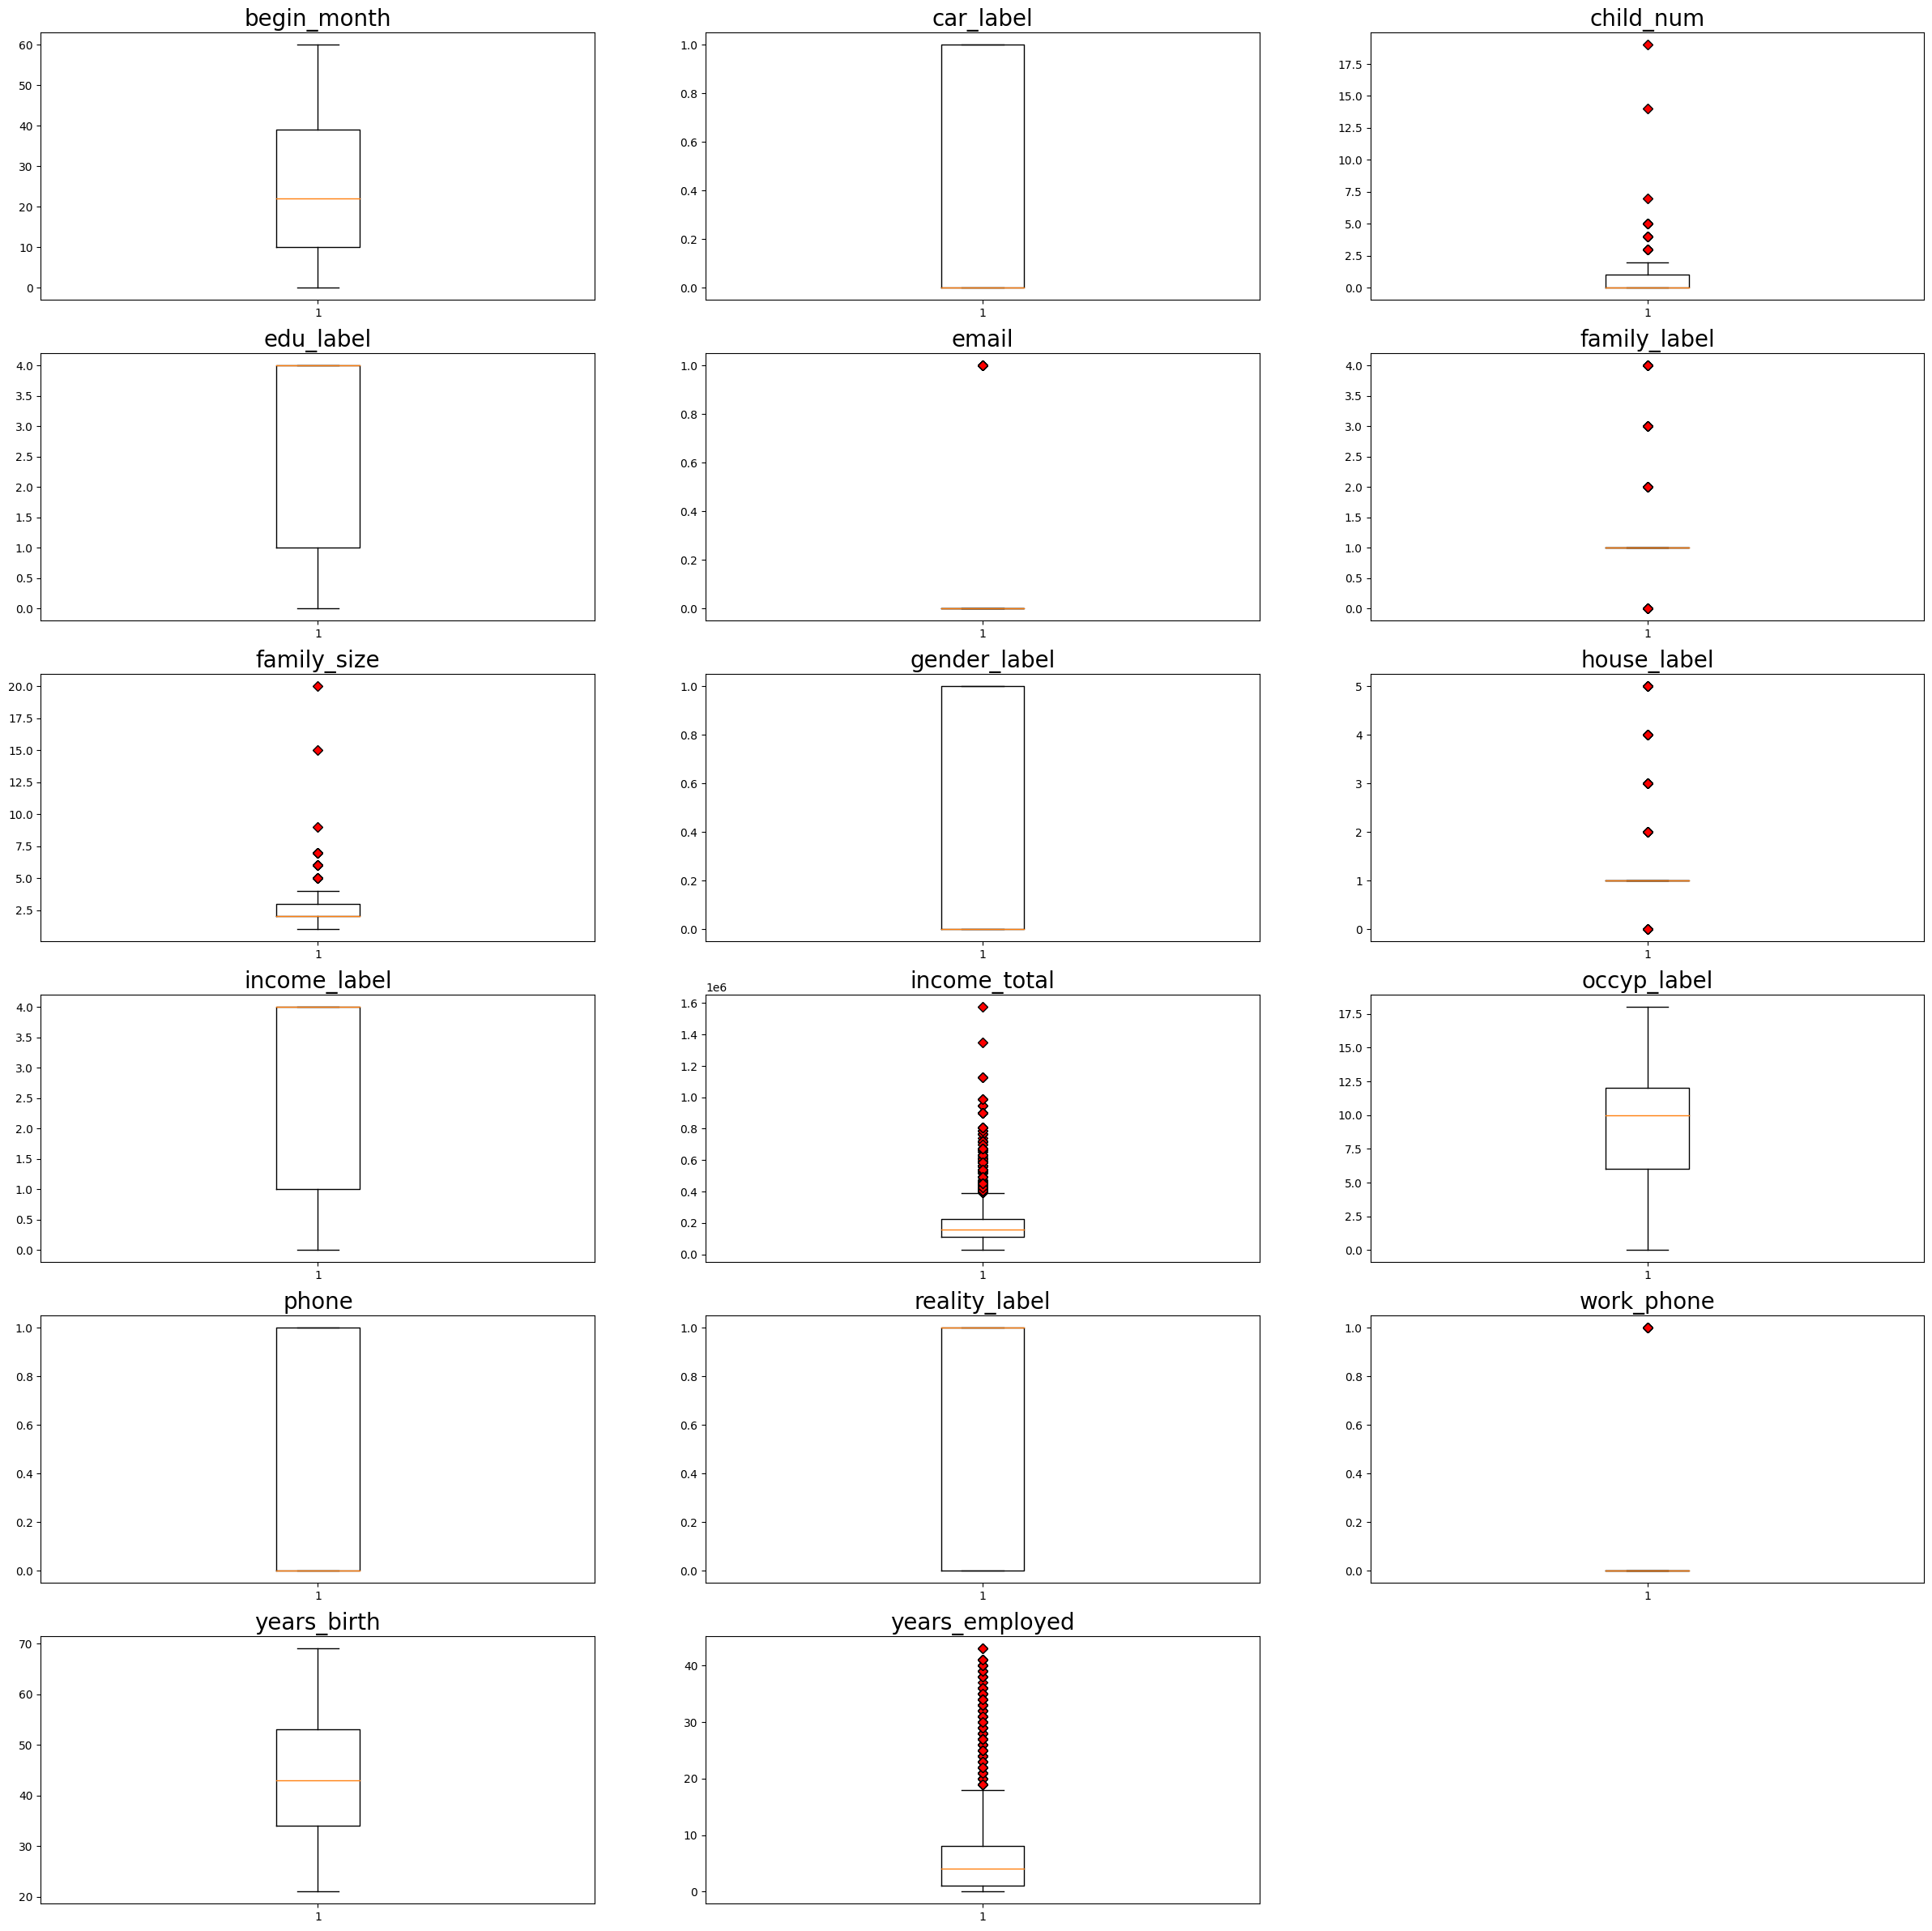

In [39]:
### 변수선정
# 1) 이상치 시각화 (boxplot)
import matplotlib.pyplot as plt
except_credit_label = df_label[df_label.columns.difference(['credit'])]

def boxplot_vis(data):
    plt.figure(figsize=(30, 30))
    for col_idx in range(len(data.columns)):
        # 6행 2열 서브플롯에 각 feature 박스플롯 시각화
        plt.subplot(6, 3, col_idx+1)
        # flierprops: 빨간색 다이아몬드 모양으로 아웃라이어 시각화
        plt.boxplot(data[data.columns[col_idx]], flierprops = dict(markerfacecolor = 'r', marker = 'D'))
        # 그래프 타이틀: feature name
        plt.title(data.columns[col_idx], fontsize = 20)
    plt.savefig('../figure/boxplot_' + data.columns[col_idx] + '.png')
    plt.show()
boxplot_vis(except_credit_label)

In [40]:
# imbalanced columns 제거: email, work_phone
df_label = df_label.drop(columns=['email', 'work_phone'])
test_label = test_label.drop(columns=['email', 'work_phone'])

# 이상치가 너무 많은 열: house, family 열 삭제
df_label = df_label.drop(columns=['house_label', 'family_label'])
test_label = test_label.drop(columns=['house_label', 'family_label'])

FileNotFoundError: [Errno 2] No such file or directory: '../figure/boxplot_occyp_label.png'

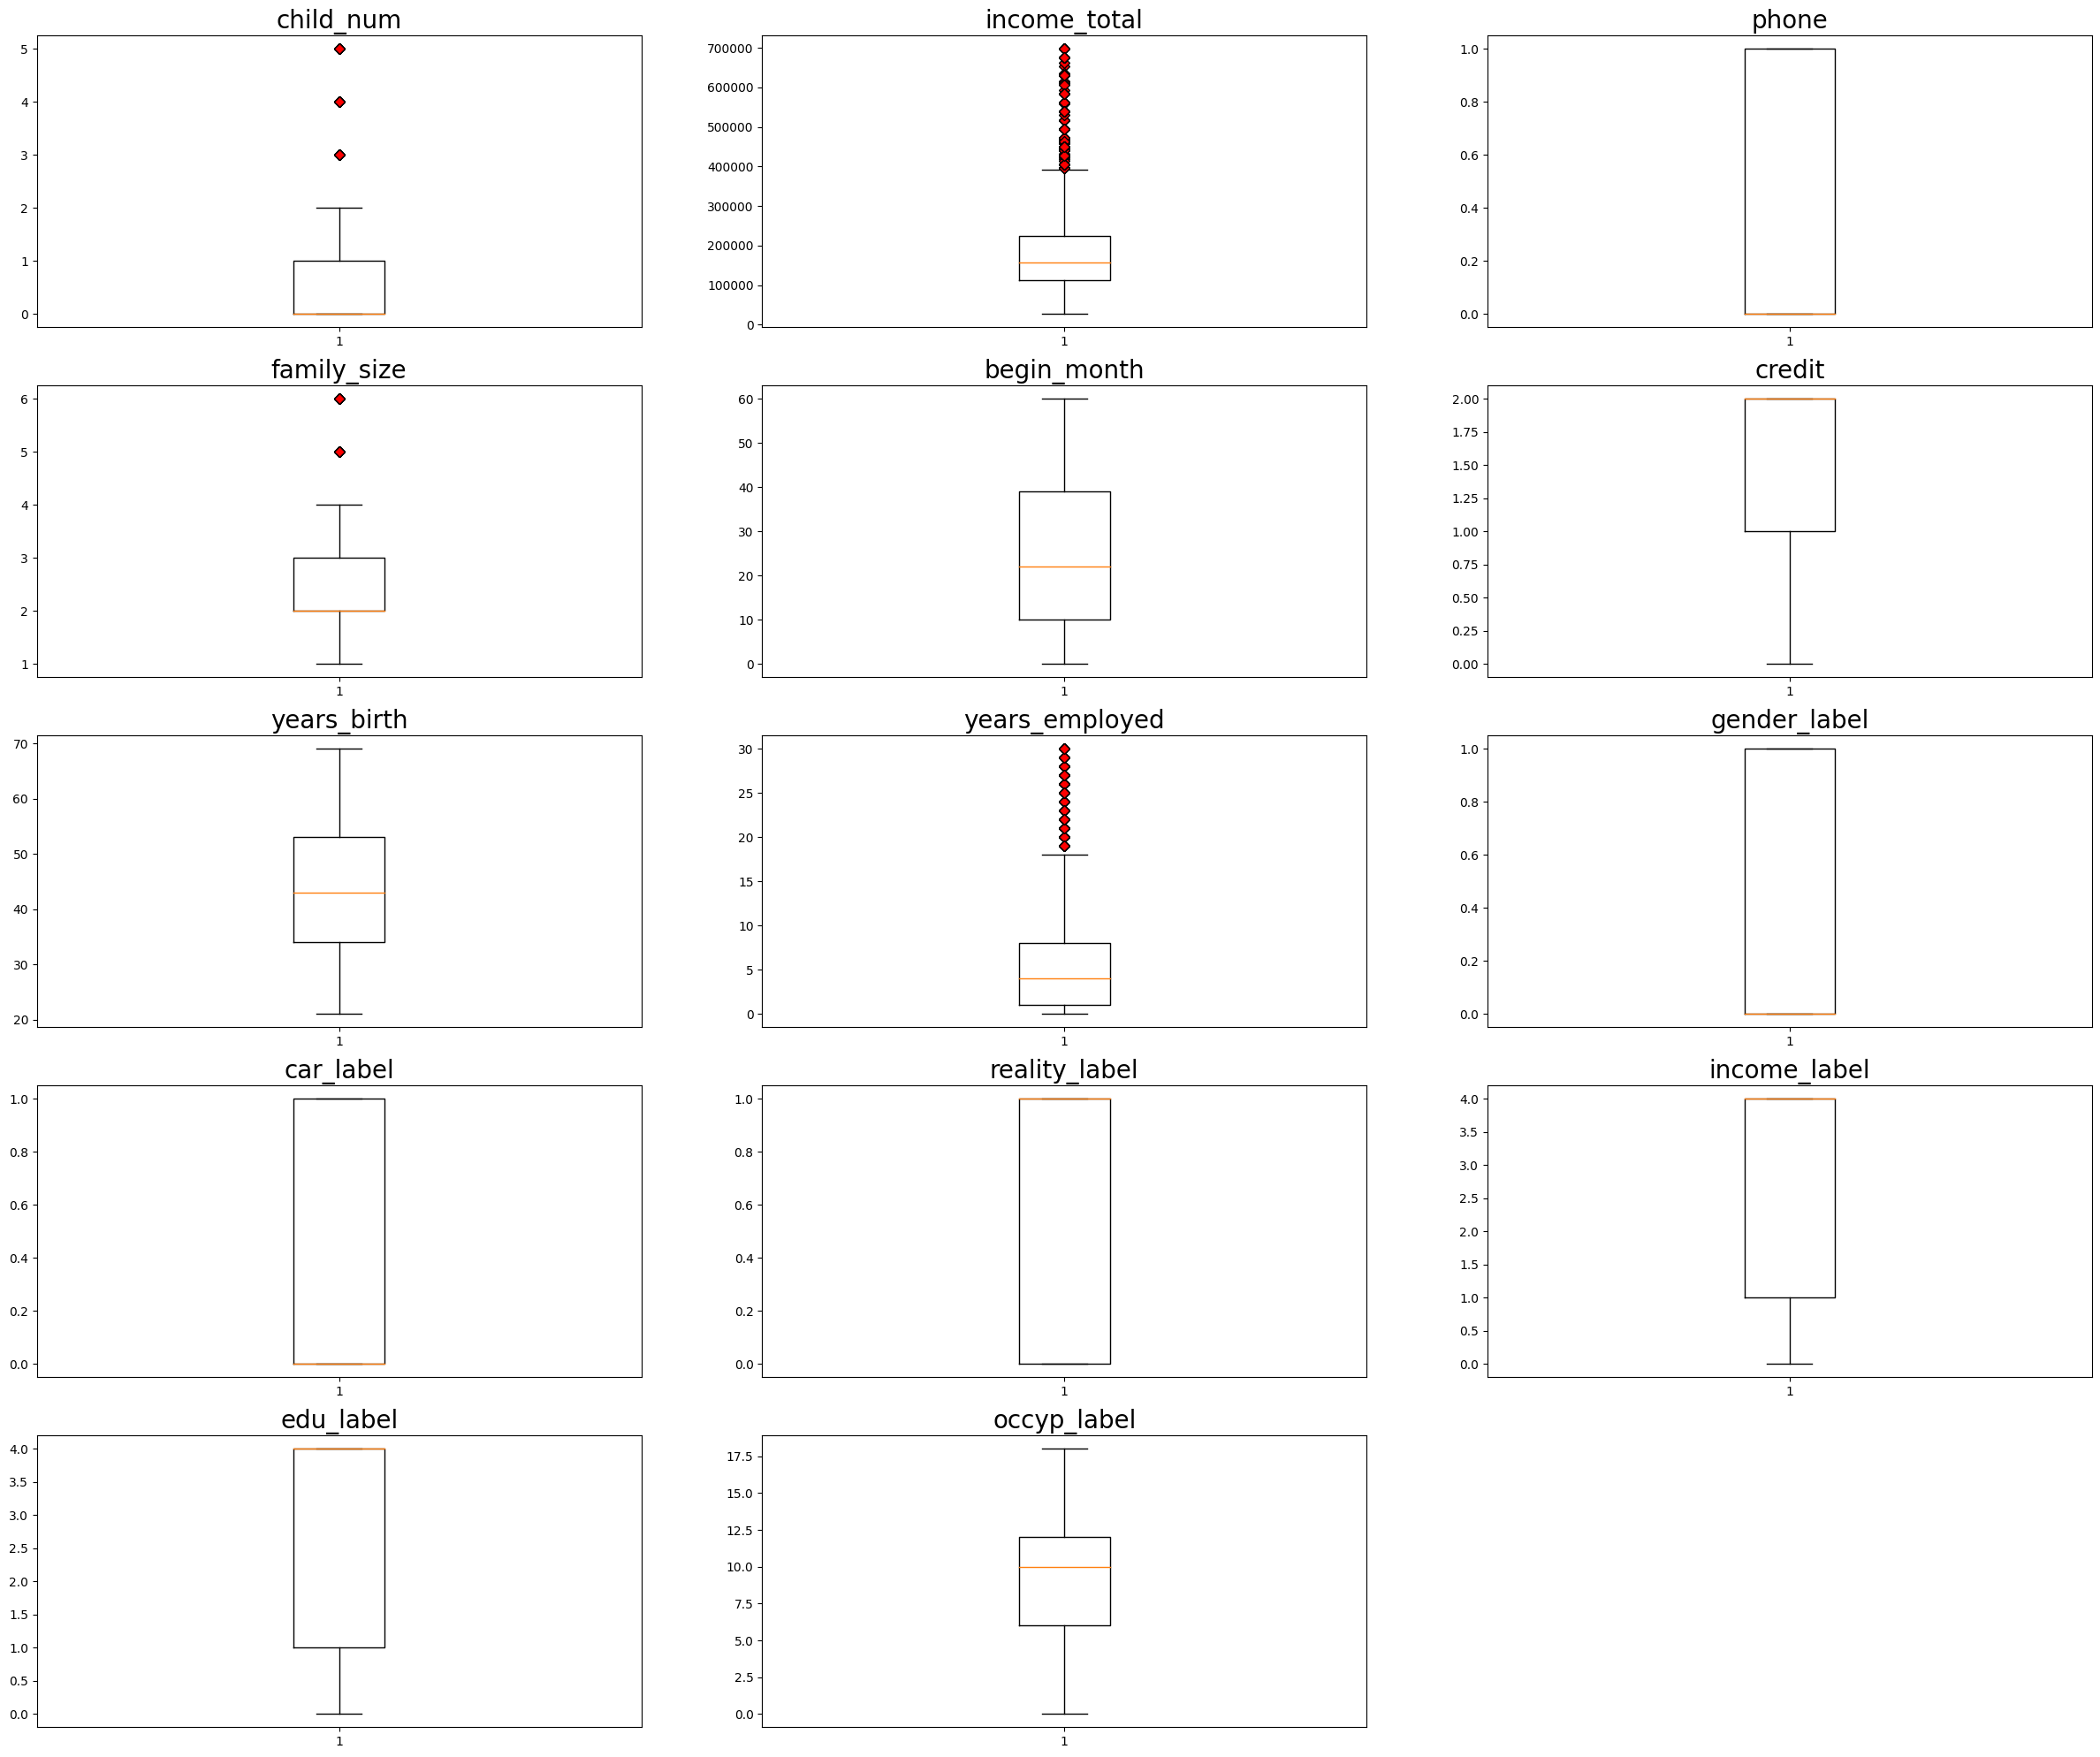

In [45]:
# child_num, income_total, family_size, years_employed
df['child_num'].value_counts()
df_label['child_num'] = df_label['child_num'].apply(lambda x: 5 if x>5 else x)
test_label['child_num'] = test_label['child_num'].apply(lambda x: 5 if x>5 else x)

df['income_total'].value_counts()
df_label['income_total'] = df_label['income_total'].apply(lambda x: 697500 if x>675000 else x)
test_label['income_total'] = test_label['income_total'].apply(lambda x: 697500 if x>675000 else x)

df['family_size'].value_counts()
df_label['family_size'] = df_label['family_size'].apply(lambda x: 6 if x>6 else x)
test_label['family_size'] = test_label['family_size'].apply(lambda x: 6 if x>6 else x)

df['years_employed'].value_counts().tail(20)
df_label['years_employed'] = df_label['years_employed'].apply(lambda x: 30 if x>30 else x)
test_label['years_employed'] = test_label['years_employed'].apply(lambda x: 30 if x>30 else x)
boxplot_vis(df_label)

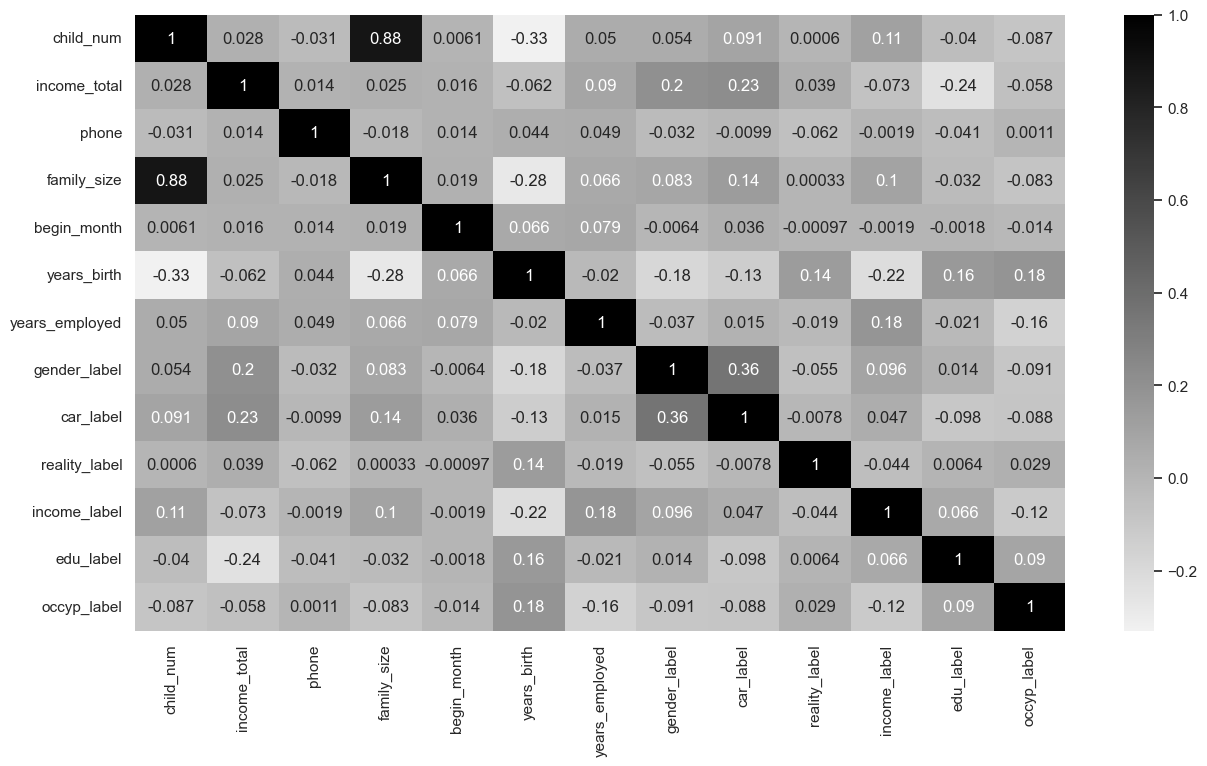

In [47]:
# 2) 다중공선성 --> 0.5 이상일 때 의심
from matplotlib import pyplot as plt
import seaborn as sns

mean_x = df_label[['child_num', 'income_total', 'phone', 'family_size', 'begin_month',
       'years_birth', 'years_employed', 'gender_label', 'car_label',
       'reality_label', 'income_label', 'edu_label', 'occyp_label']]
cmap = sns.light_palette("black", as_cmap=True)
sns.set(rc={'figure.figsize': (15, 8)})
sns.heatmap(mean_x.corr(), annot=True, cmap=cmap) #fmt='3.1f'
plt.show() # child_num이랑 family_size 다중공선성 의심 > child_num 삭제
df_label = df_label.drop(columns='child_num')
test_label = test_label.drop(columns='child_num')

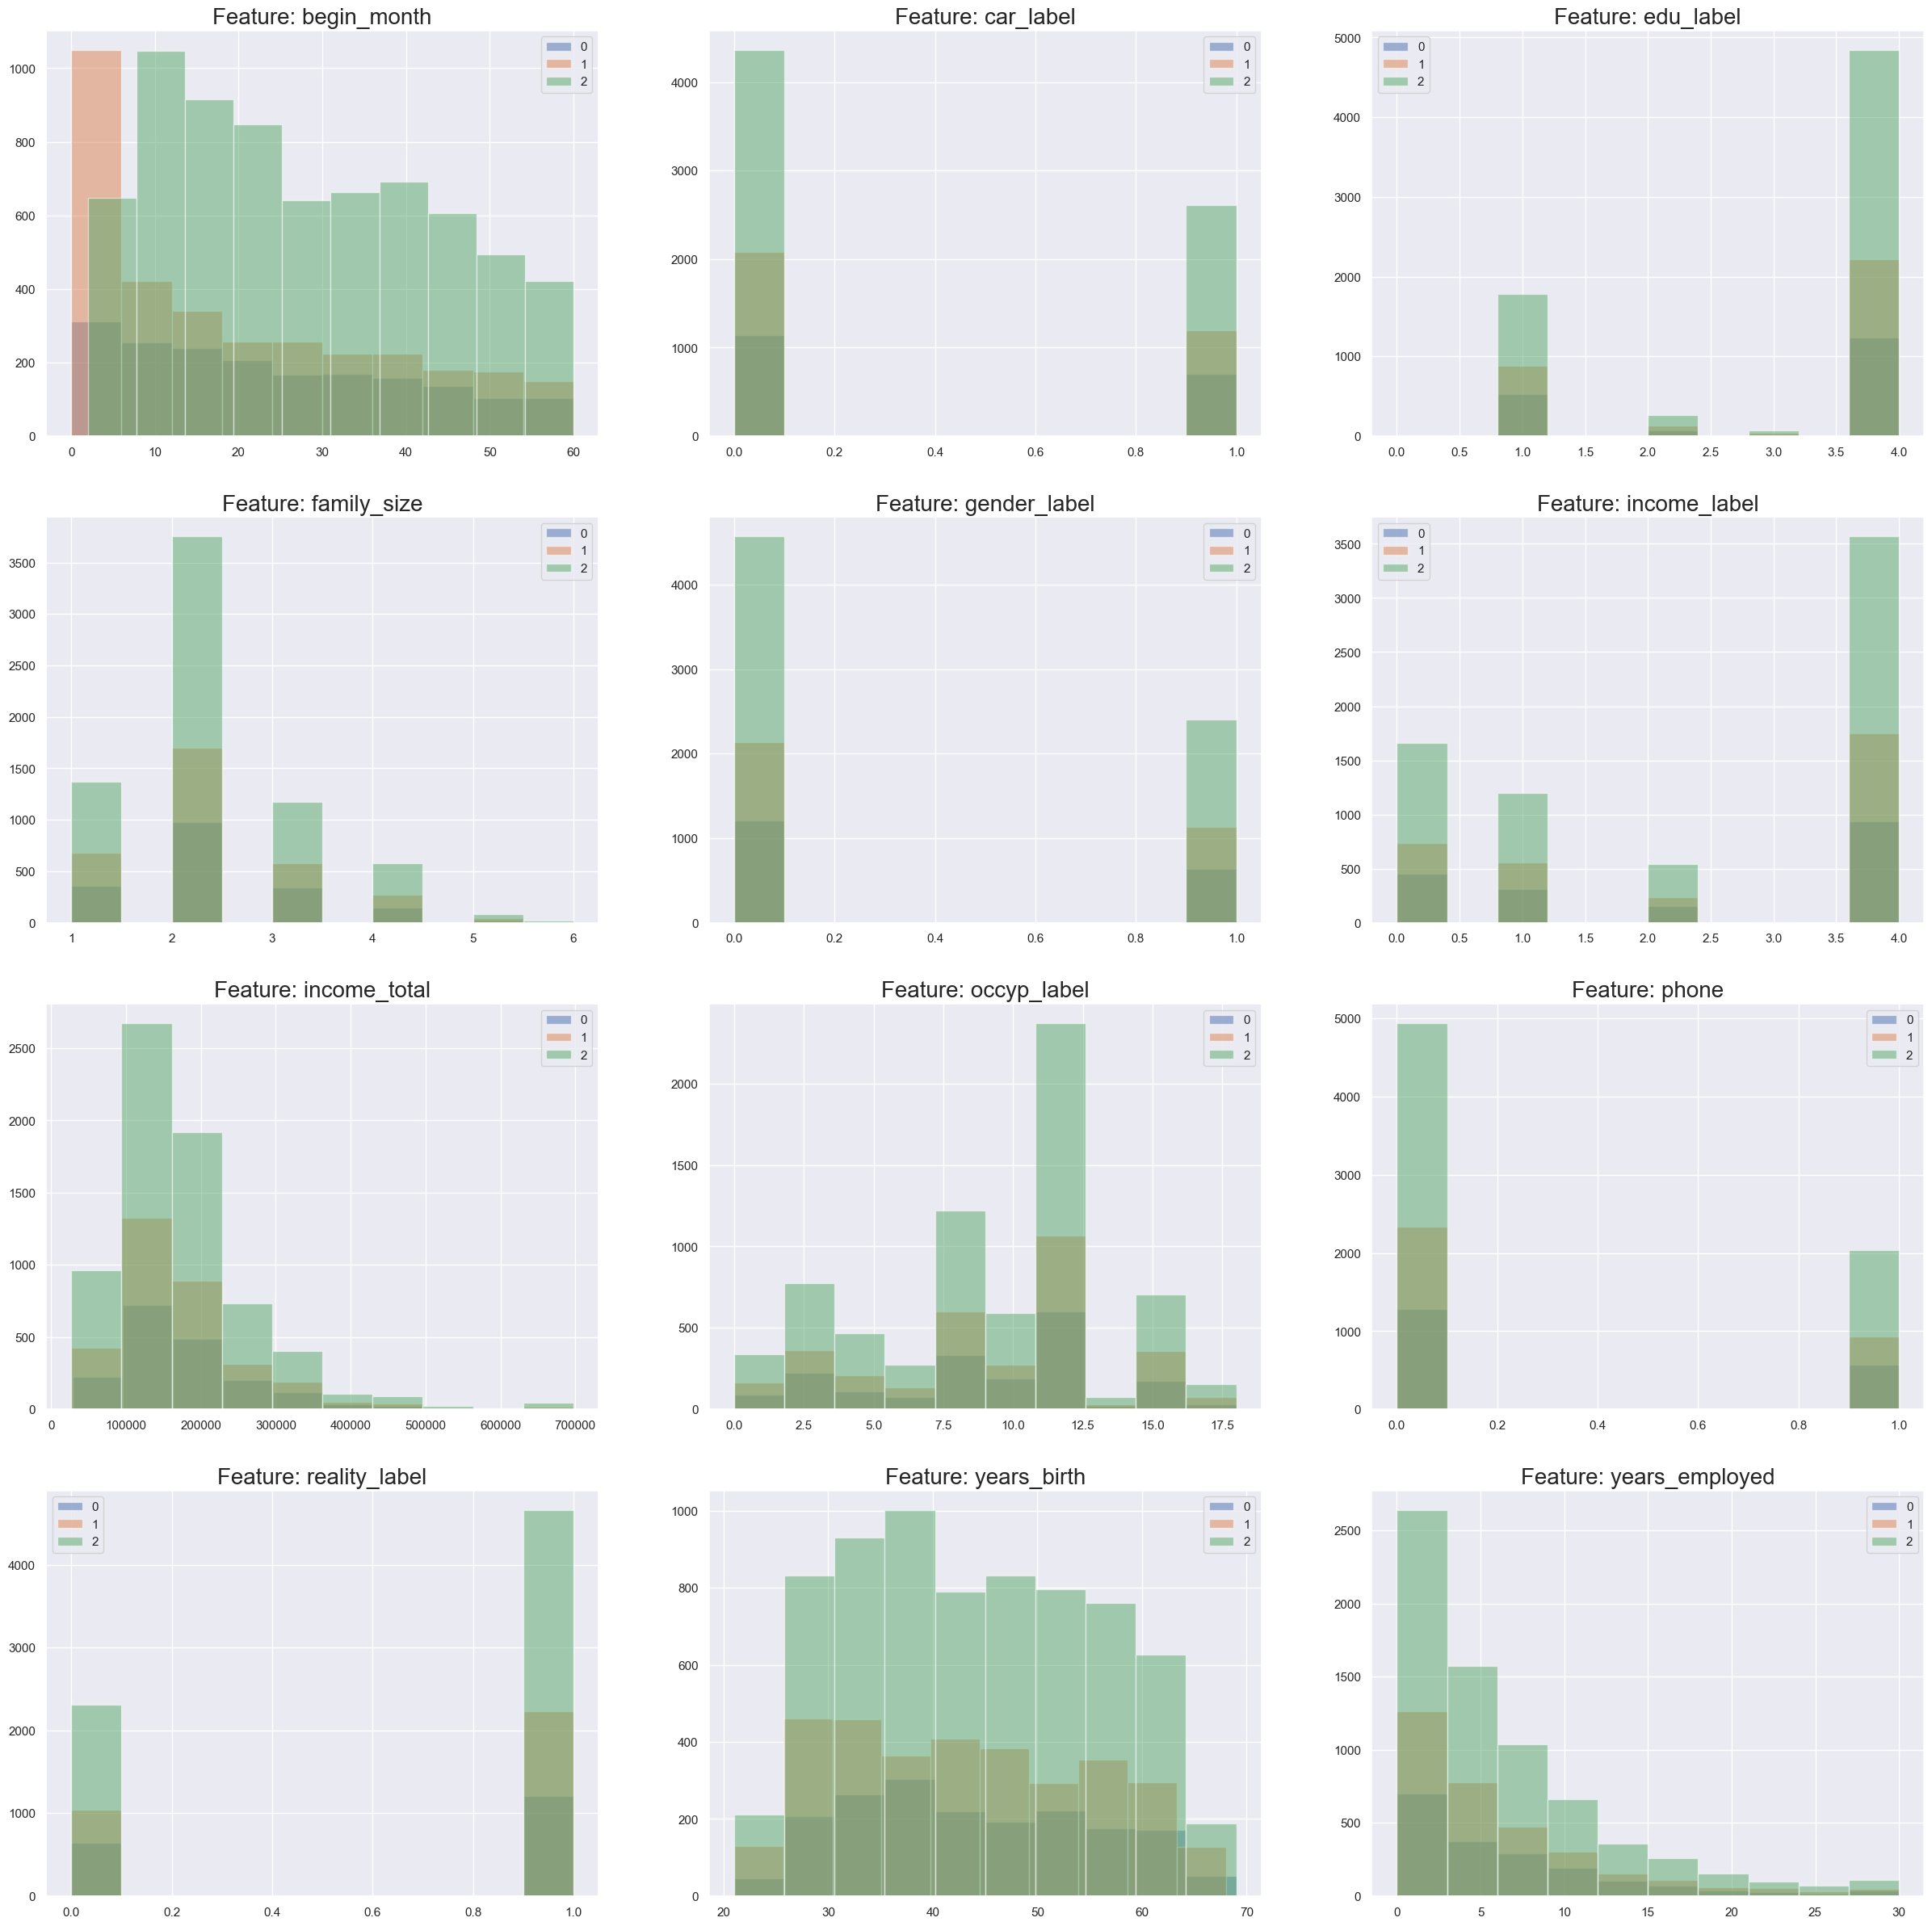

In [49]:
### 최종 변수 시각화 (https://heytech.tistory.com/149)
x_label = df_label[df_label.columns.difference(['credit'])]
feature_name_label = x_label.columns
plt.figure(figsize=(30, 30))
for col_idx in range(len(feature_name_label)): # 히스토그램으로 나타내는게 맞는지 모르겠음
    plt.subplot(4, 3, col_idx+1)
    plt.hist(df_label[df_label["credit"] == 0][feature_name_label[col_idx]], label = "0", alpha = 0.5)
    plt.hist(df_label[df_label["credit"] == 1][feature_name_label[col_idx]], label = "1", alpha = 0.5)
    plt.hist(df_label[df_label["credit"] == 2][feature_name_label[col_idx]], label = "2", alpha = 0.5)
    plt.legend()
    # 그래프 타이틀: feature name
    plt.title("Feature: "+ feature_name_label[col_idx], fontsize = 20)
plt.show()

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97      1850
         1.0       0.98      0.98      0.98      3275
         2.0       0.98      0.99      0.99      6974

    accuracy                           0.98     12099
   macro avg       0.99      0.98      0.98     12099
weighted avg       0.98      0.98      0.98     12099

out-of-bag 성능평가 점수:  0.5384742540705844
Accuracy:  0.9849574344987189
변수 중요도:  [0.13613268 0.02379662 0.05072128 0.35568966 0.14334379 0.09634937
 0.02146048 0.02280181 0.02358665 0.02579918 0.02471754 0.07560095]


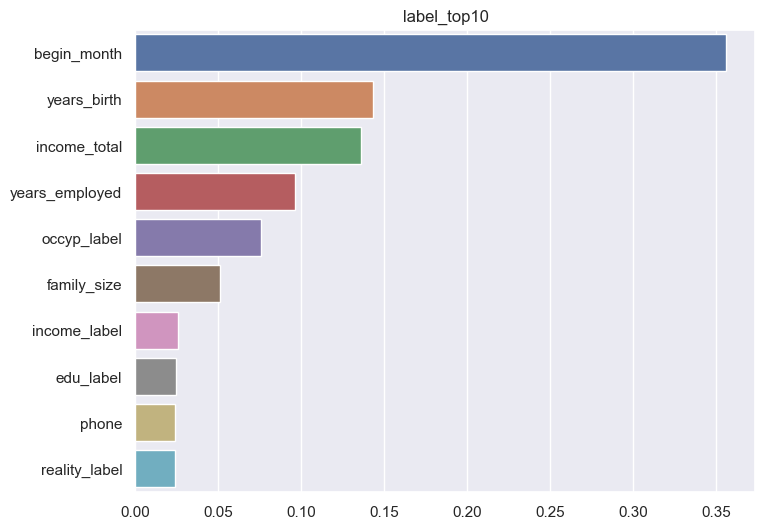

In [55]:
### 3. 예측 모델 선정
# 1) randomforest (https://heytech.tistory.com/149)
# from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
train_x_label = df_label.drop(columns='credit')
train_y_label = df_label['credit']
rf_label = RandomForestClassifier(oob_score=True).fit(train_x_label, train_y_label)

from sklearn.metrics import classification_report
import mglearn
pred_y_label = rf_label.predict(train_x_label)
print(classification_report(train_y_label, pred_y_label))
print("out-of-bag 성능평가 점수: ", rf_label.oob_score_) # out-of-bag 성능평가 점수
print("Accuracy: ", rf_label.score(train_x_label, train_y_label)) # Accuracy
print("변수 중요도: ", rf_label.feature_importances_) # 변수 중요도
rf_importances_label = rf_label.feature_importances_
rfimpt_label = pd.Series(rf_importances_label, index=train_x_label.columns)
label_top10 = rfimpt_label.sort_values(ascending=False)[:10]
plt.figure(figsize=(8,6))
plt.title("label_top10")
sns.barplot(x=label_top10, y=label_top10.index)
plt.show()

out-of-bag 성능평가 점수:  -0.12322938119495541
Accuracy:  0.8276708292988019
변수 중요도:  [0.14820012 0.02568328 0.0531139  0.28006976 0.1654264  0.10822051
 0.02288589 0.02546682 0.02658436 0.03397821 0.02646703 0.08390371]


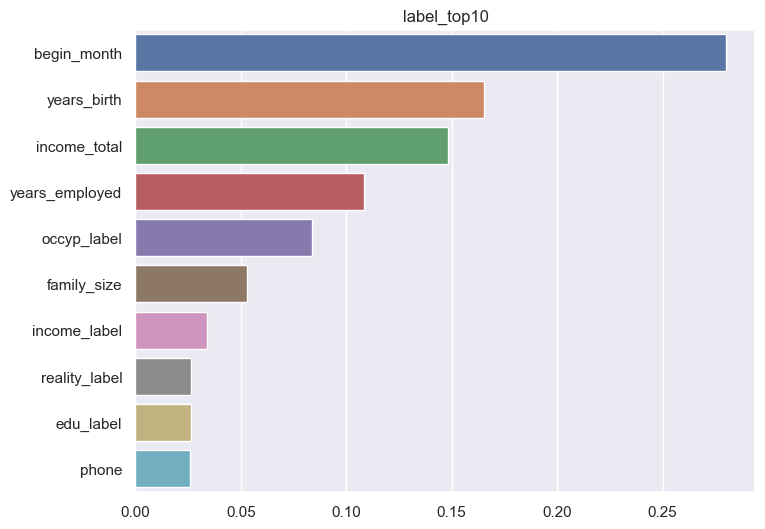

In [56]:
# 2) randomforest regressor
from sklearn.ensemble import RandomForestRegressor
rfreg_label = RandomForestRegressor(oob_score=True).fit(train_x_label, train_y_label)

print("out-of-bag 성능평가 점수: ", rfreg_label.oob_score_) # out-of-bag 성능평가 점수
print("Accuracy: ", rfreg_label.score(train_x_label, train_y_label)) # Accuracy
print("변수 중요도: ", rfreg_label.feature_importances_) # 변수 중요도
rfreg_importances_label = rfreg_label.feature_importances_
rfregimpt_label = pd.Series(rfreg_importances_label, index=train_x_label.columns)
label_top10 = rfregimpt_label.sort_values(ascending=False)[:10]
plt.figure(figsize=(8,6))
plt.title("label_top10")
sns.barplot(x=label_top10, y=label_top10.index)
plt.show()

In [60]:
# 3) catboost
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
cb = CatBoostClassifier().fit(train_x_label, train_y_label)
pred_y = cb.predict(train_x_label)
print(round(accuracy_score(train_y_label, pred_y)*100, 2))

Learning rate set to 0.089855
0:	learn: 1.0597780	total: 6.24ms	remaining: 6.24s
1:	learn: 1.0288517	total: 13.1ms	remaining: 6.53s
2:	learn: 1.0035453	total: 16.9ms	remaining: 5.61s
3:	learn: 0.9821048	total: 21.2ms	remaining: 5.28s
4:	learn: 0.9646541	total: 27.3ms	remaining: 5.43s
5:	learn: 0.9513766	total: 31.8ms	remaining: 5.27s
6:	learn: 0.9391890	total: 38.2ms	remaining: 5.42s
7:	learn: 0.9287343	total: 43.9ms	remaining: 5.45s
8:	learn: 0.9199696	total: 48.3ms	remaining: 5.32s
9:	learn: 0.9123619	total: 52.8ms	remaining: 5.23s
10:	learn: 0.9065263	total: 58.9ms	remaining: 5.3s
11:	learn: 0.9010431	total: 64.6ms	remaining: 5.32s
12:	learn: 0.8962946	total: 68.5ms	remaining: 5.2s
13:	learn: 0.8922461	total: 73.2ms	remaining: 5.16s
14:	learn: 0.8885367	total: 77.3ms	remaining: 5.08s
15:	learn: 0.8857105	total: 81.2ms	remaining: 5s
16:	learn: 0.8835141	total: 86.7ms	remaining: 5.02s
17:	learn: 0.8811338	total: 90.7ms	remaining: 4.95s
18:	learn: 0.8794988	total: 94.8ms	remaining: 4.8